# <span style="color:blue">Desafío 3- Predicción de churn</span>

### <span style="color:orange">Importación de librerías - Cargar la data</span>

In [249]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Cargar los datos 
file_path = r'C:\Users\atapi\Documents\DATA SCIENCE\Modulo 5-ML\aprendizaje no supervisado II\desafio\Telco-Customer-Churn.xlsx'
data = pd.read_excel(file_path)


### <span style="color:orange">Análisis Exploratorio de Datos</span>

In [251]:
# Visualizar información general del dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [252]:
# Estadísticas descriptivas de las columnas numéricas
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [253]:
# Identificar filas con valores faltantes en la columna 'TotalCharges'
missing_totalcharges = data[data['TotalCharges'].isna()]
missing_totalcharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [254]:
# Comprobar valores únicos en la columna "Churn" 
churn_unique_values = data['Churn'].unique() if 'Churn' in data.columns else None
churn_unique_values

array(['No', 'Yes'], dtype=object)

### <span style="color:orange">Exploración inicial del conjunto de datos</span>

**Estructura y características generales:**

- El conjunto de datos contiene 7043 registros y 21 columnas.
- Las columnas incluyen tanto variables categóricas como numéricas.
- La columna TotalCharges tiene valores faltantes en 11 filas.

**Variables clave:**

- *customerID:* Identificador único del cliente.
- *Churn:* Variable objetivo que indica si un cliente ha abandonado ("Yes") o no ("No").

**Estadísticas descriptivas:**

- tenure (tiempo como cliente): Varía de 0 a 72 meses.
- MonthlyCharges (cargos mensuales): Varía de 18.25 a 118.75.
- TotalCharges (cargos totales): Varía de 18.8 a 8684.8, pero tiene valores faltantes.

**Distribución de Churn:** Dos valores únicos: Yes y No, lo que confirma que es una variable categórica.

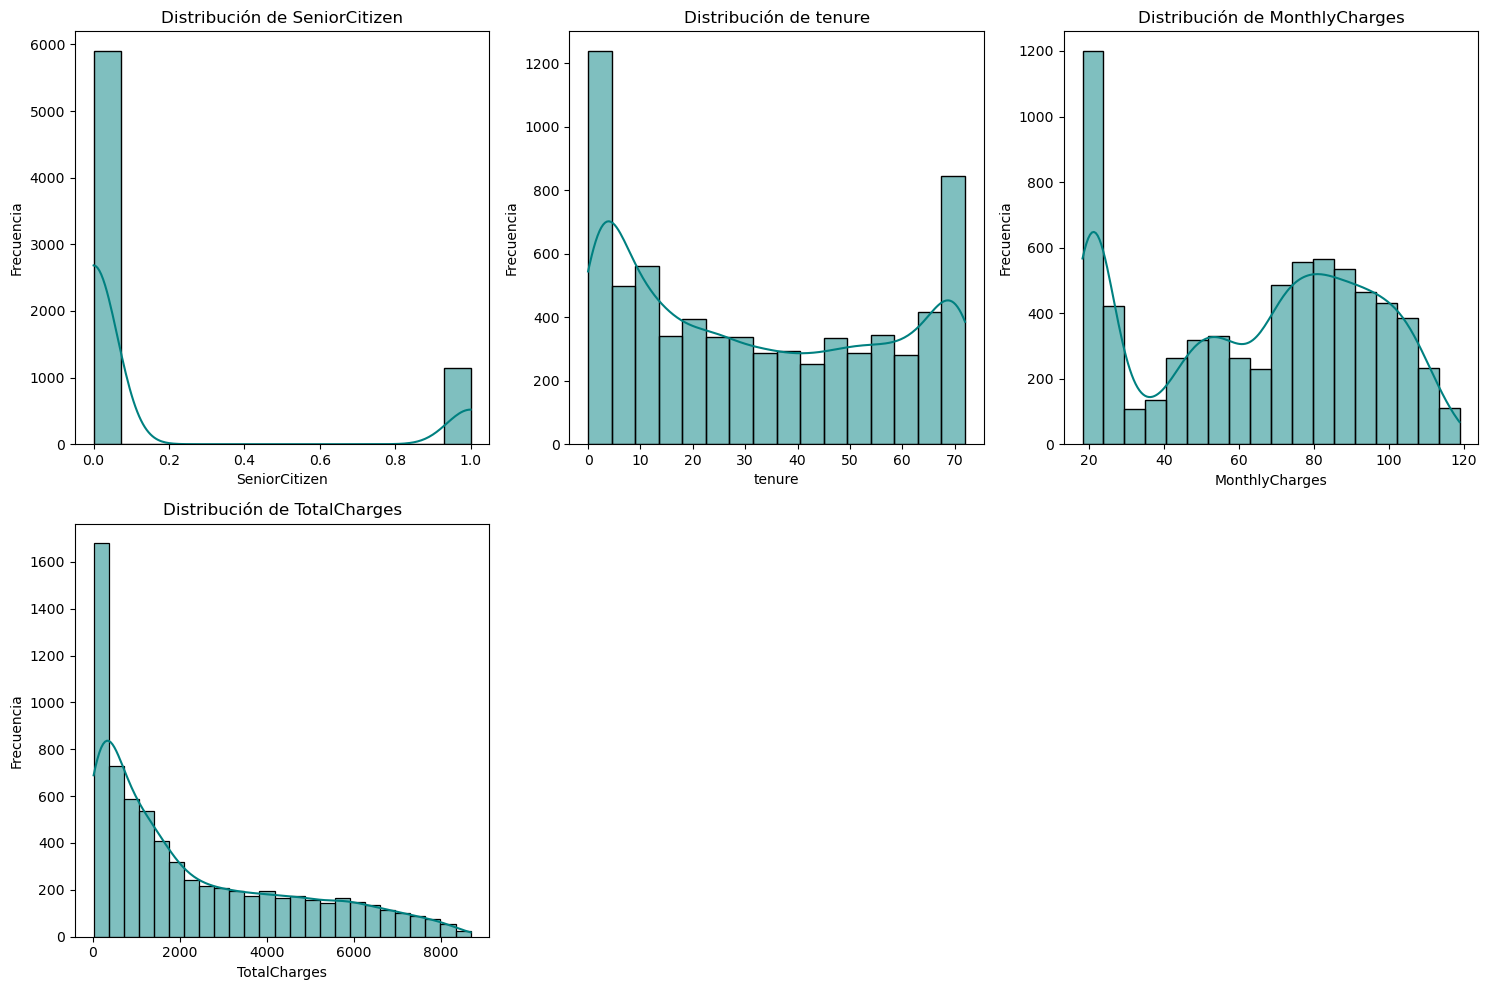

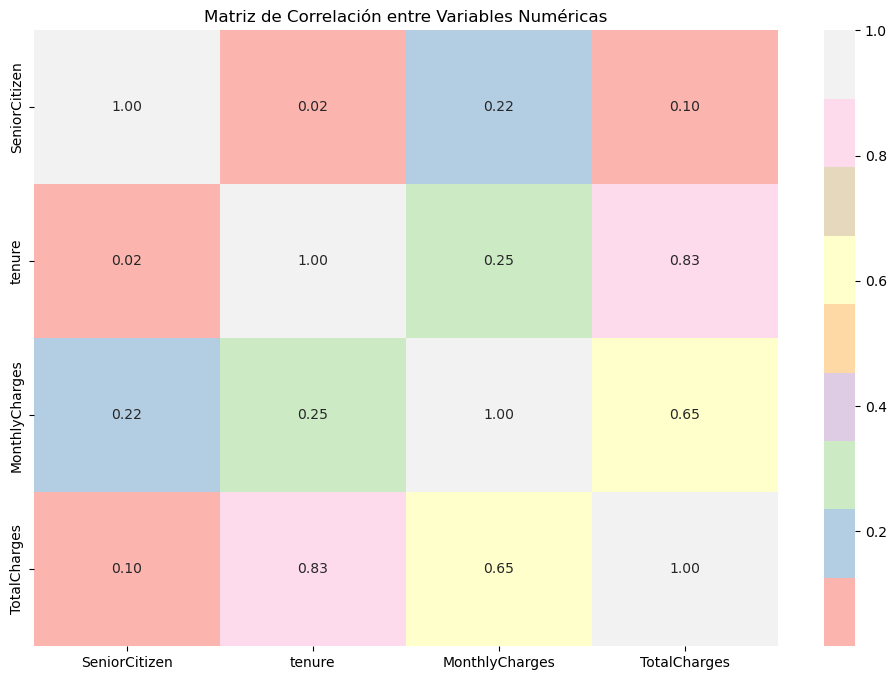

In [256]:
# Seleccionar columnas categóricas
categorical_cols = data.select_dtypes(include=['object']).columns

# Seleccionar columnas numéricas
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Distribución de variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:6]):  # Graficar las primeras 6 columnas numéricas
    plt.subplot(2, 3, i + 1)
    sns.histplot(
        data[col], 
        kde=True, 
        color='teal'
    )
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Matriz de correlación entre variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='Pastel1', 
    fmt=".2f"
)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


**<span style="color:purple">Análisis</span>**

1. **Histogramas de Variables Numéricas**
    - **SeniorCitizen**:
      - Distribución bimodal, con valores concentrados en 0 y 1. Es una variable categórica.
    - **tenure (Tiempo de permanencia):**
      - Distribución sesgada a la izquierda, con más clientes en la categoría de baja permanencia.
      - Indica que la mayoría de los clientes tienen poco tiempo en el servicio.
    - **MonthlyCharges(Cargos mensuales):**
      - Distribución relativamente uniforme, refleja que los cargos mensuales están bien distribuidos entre diferentes niveles de servicio.
    - **TotalCharges**:
      - Distribución sesgada positivamente. Clientes con cargos totales bajos son más comunes, probablemente debido a menor tiempo de permanencia.

2. **Matriz de Correlación**
    - **Relaciones Fuertes**:
      - **TotalCharges y tenure**: Correlación fuerte (**0.83**), lo cual es lógico ya que los cargos totales aumentan con el tiempo de permanencia.
      - **MonthlyCharges y TotalCharges**: Correlación moderada (**0.65**), indicando que los cargos mensuales influyen en los cargos totales, pero no son el único factor.
    - **Relaciones Débiles**:
      - **SeniorCitizen** muestra correlaciones muy bajas (< 0.25) con otras variables numéricas, lo que indica poca relación con el tiempo de permanencia o los cargos.

**Conclusiones**
1. **Distribuciones**:
   - La mayoría de los clientes tienen poca permanencia en el servicio y generan cargos totales bajos.
   - Las variables *MonthlyCharges* y *TotalCharges* reflejan distintos niveles de servicio, mientras que *SeniorCitizen* parece ser más categórica.
2. **Relaciones**:
   - Los cargos totales están fuertemente relacionados con la permanencia, pero menos con los cargos mensuales.
   - La edad (*SeniorCitizen*) no parece influir directamente en las demás variables numéricas.


### <span style="color:orange">Procesamiento de datos</span>

In [258]:
# Manejo de valores faltantes
# En la columna 'TotalCharges', rellenamos los valores nulos con 0.
# Los clientes con valores nulos en esta columna tienen 'tenure' (antigüedad) igual a 0.
data['TotalCharges'] = data['TotalCharges'].fillna(0)

# Codificación de variables categóricas
# Identificar las columnas categóricas en el conjunto de datos. 
# Estas son las columnas que contienen valores de tipo 'object' y que deben ser convertidas a números.
col_categorica = data.select_dtypes(include=['object']).columns.tolist()

# Excluir 'customerID' de las columnas categóricas porque es un identificador único y no aporta al modelo.
col_categorica.remove('customerID')

# Crear un diccionario de codificadores para cada columna categórica utilizando LabelEncoder.
# Esto transforma valores como 'Yes'/'No' o 'Male'/'Female' en valores numéricos como 0 y 1.
cod_label = {col: LabelEncoder() for col in col_categorica}
for col, encoder in cod_label.items():
    data[col] = encoder.fit_transform(data[col])  # Aplicar la codificación a cada columna categórica

# Escalado de datos numéricos
# Identificar las columnas numéricas que deben ser escaladas.
# Esto normaliza los valores para que tengan una media de 0 y desviación estándar de 1.
col_numerica = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Usar StandardScaler para escalar las columnas numéricas.
scaler = StandardScaler()
data[col_numerica] = scaler.fit_transform(data[col_numerica])

# Separación de la variable objetivo ('Churn')
# La variable 'Churn' es nuestra variable objetivo, es decir, lo que queremos predecir.
# Eliminamos 'Churn' y 'customerID' del conjunto de características porque 'customerID' no aporta información relevante.
X = data.drop(columns=['Churn', 'customerID'])

# La variable objetivo ('Churn') se separa en 'y'.
y = data['Churn']

# Visualizar una muestra de los datos preprocesados
# Muestra las primeras 5 filas de las características (X) y de la variable objetivo (y).
X_sample = X.head()
y_sample = y.head()

X_sample, y_sample

(   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
 0       0              0        1           0 -1.277445             0   
 1       1              0        0           0  0.066327             1   
 2       1              0        0           0 -1.236724             1   
 3       1              0        0           0  0.514251             0   
 4       0              0        0           0 -1.236724             1   
 
    MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
 0              1                0               0             2   
 1              0                0               2             0   
 2              0                0               2             2   
 3              1                0               2             0   
 4              0                1               0             0   
 
    DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
 0                 0            0            0                0    

**Resultado:**

1. **Datos preprocesados (X_sample):**

- Cada fila es un cliente y cada columna representa una característica predictora:

    - **Variables categóricas:** Convertidas a valores numéricos mediante LabelEncoder. Por ejemplo, en gender: 0 representa "Female" y 1 "Male".
    - **Variables numéricas (tenure, MonthlyCharges, TotalCharges):** Escaladas usando StandardScaler para tener una media de 0 y desviación estándar de 1. Por ejemplo un valor como -1.277445 en tenure indica que este cliente está aproximadamente a 1.28 desviaciones estándar por debajo de la media.

2. **Variable objetivo (y_sample):**

- Representa si un cliente abandonó (Churn) o no:

    - **Valores:**
        - 0: Cliente no abandonó.
        - 1: Cliente sí abandonó.
          
    - **Ejemplo:**
        - La primera fila del resultado:
            - *tenure = -1.277445:* Cliente con tiempo como cliente bajo.
            - *gender = 0:* Cliente clasificado como "Female".
            - *Churn = 0:* Cliente no abandonó.

3. **Propósito:** Esta muestra ayuda a verificar que el preprocesamiento se realizó correctamente y que los datos están listos para el entrenamiento de modelos.

### <span style="color:orange">Dividir los datos en conjuntos de entrenamiento y prueba</span>

- **División del conjunto de datos en entrenamiento y prueba**
    - Utilizamos la función `train_test_split` de scikit-learn para dividir el conjunto de datos en:
        - Conjunto de entrenamiento: Usado para entrenar los modelos.
        - Conjunto de prueba: Usado para evaluar el rendimiento de los modelos.


- **Parámetros de la función:**
    - **X**: Conjunto de características predictoras (variables independientes).
    - **y**: Variable objetivo que queremos predecir (Churn: 0 o 1).
    - **test_size=0.3**: El 30% de los datos se asignarán al conjunto de prueba, y el 70% al conjunto de entrenamiento.
    - **random_state=42**: Asegura la reproducibilidad de la división, siendo la misma división en cada ejecución.
    - **stratify=y**: Asegura que la proporción de las clases en el conjunto de entrenamiento y prueba sea similar a la del conjunto original.

- **Mostrar las dimensiones de los conjuntos resultantes**
    - Esto nos permite verificar cuántas filas y columnas hay en cada conjunto.
        - **X_train.shape**: Dimensiones de las características del conjunto de entrenamiento (filas y columnas).
        - **y_train.shape**: Número de filas en la variable objetivo del conjunto de entrenamiento.
        - **X_test.shape**: Dimensiones de las características del conjunto de prueba.
        - **y_test.shape**: Número de filas en la variable objetivo del conjunto de prueba

In [261]:
# División del conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Mostrar las dimensiones de los conjuntos resultantes
train_shape = X_train.shape, y_train.shape
test_shape = X_test.shape, y_test.shape

'''Devolver las dimensiones para inspección.
El resultado indicará:
 - `X_train`: 70% del total de registros y todas las columnas predictoras.
 - `X_test`: 30% del total de registros y todas las columnas predictoras.
 - `y_train` y `y_test`: Igual número de filas que `X_train` y `X_test` respectivamente, pero con solo una columna (variable objetivo).'''

train_shape, test_shape


(((4930, 19), (4930,)), ((2113, 19), (2113,)))

**La división del conjunto de datos nos entrega:**

- **Conjunto de entrenamiento:**

        - 4930 registros.
        - 19 características predictoras.

- **Conjunto de prueba:**

        - 2113 registros.
        - 19 características predictoras.

### <span style="color:orange">Entrenamiento de modelos</span>

**Entrenaré tres algoritmos: Modelo KNN, Árboles de decisión y Naive Bayes.**

#### **<span style="color:purple">Modelo KNN</span>**

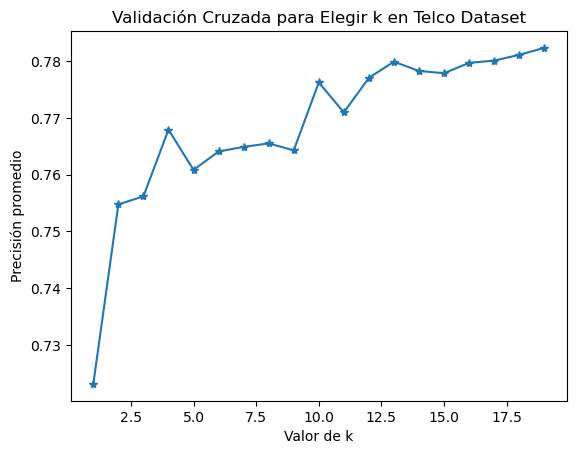

(19, 0.7704685281590156)

In [264]:
# Modelo KNN 
## Se realiza Validación cruzada para determinar el mejor valor de k antes del entrenamiento final

mean_scores = []  # Lista para almacenar las precisiones promedio de cada valor de k
k_values = range(1, 20)  # Valores de k a probar, desde 1 hasta 19

# Realizar validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Crear un modelo KNN con el valor actual de k
    # Realizar validación cruzada en el conjunto de entrenamiento con 5 divisiones (folds)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  
    # Calcular la precisión promedio para este valor de k y almacenarla
    mean_scores.append(np.mean(scores))

# Determinar el mejor valor de k (el que tenga la precisión promedio más alta)
best_k = k_values[np.argmax(mean_scores)]

# Graficar los resultados de la validación cruzada
plt.plot(k_values, mean_scores, marker='*')  # Gráfica de precisión promedio en función de k
plt.xlabel('Valor de k')  
plt.ylabel('Precisión promedio')  
plt.title('Validación Cruzada para Elegir k en Telco Dataset')  
plt.show()

# Entrenar el modelo KNN con el mejor valor de k encontrado
knn = KNeighborsClassifier(n_neighbors=best_k)  # Crear el modelo con el mejor k
knn.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Evaluar el modelo en el conjunto de prueba
y_pred = knn.predict(X_test)  # Realizar predicciones en los datos de prueba
test_accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión en el conjunto de prueba

# Imprimir el mejor valor de k y la precisión obtenida en el conjunto de prueba
best_k, test_accuracy


**<span style="color:olive">Resultados del Modelo KNN</span>** 

- **Mejor valor de k**: 19
  - El modelo KNN alcanzó su mejor rendimiento utilizando k=19 (es decir, considerando los 19 vecinos más cercanos para la clasificación).

- **Precisión en el conjunto de prueba**: 77.05%
  - Esto significa que el modelo tiene una precisión del **77.05%** al clasificar correctamente los ejemplos del conjunto de prueba.

 **<span style="color:blue">Evaluación del modelo - código</span>**


Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.83      0.87      0.85      1552
       Churn       0.58      0.50      0.54       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113


Matriz de confusión:
[[1348  204]
 [ 281  280]]


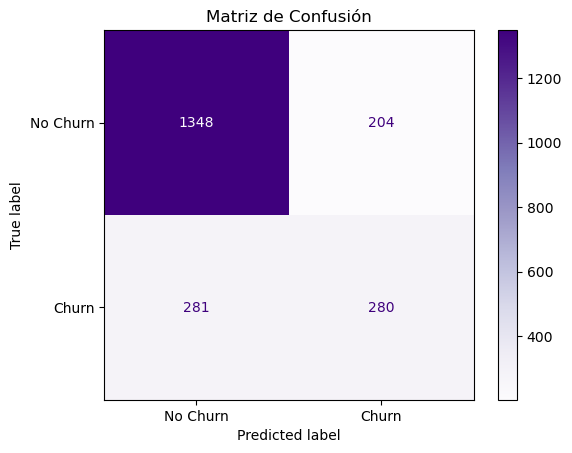

In [266]:
# Reporte de métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Matriz de confusión
print("\nMatriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Purples)
plt.title("Matriz de Confusión")
plt.show()

### **<span style="color:blue">Evaluación del modelo KNN</span>**

- **REPORTE DE CLASIFICACIÓN**

    - **Precision**:
      - **No Churn**: El 83% de las predicciones etiquetadas como "No Churn" fueron correctas.
      - **Churn**: El 58% de las predicciones etiquetadas como "Churn" fueron correctas, indicando falsos positivos elevados para esta clase.

    - **Recall**:
      - **No Churn**: El modelo identificó correctamente el 87% de los casos reales de "No Churn".
      - **Churn**: El modelo identificó correctamente el 50% de los casos reales de "Churn", lo que muestra una baja capacidad para capturar la clase minoritaria.

    - **F1-Score**:
      - **No Churn**: Combina precisión y recall, alcanzando un puntaje F1 sólido de 0.85.
      - **Churn**: Refleja un menor rendimiento en la clase "Churn" con un F1-Score de 0.54.

    - **Support**:
      - Representa el número total de instancias reales en cada clase:
        - **1552 casos reales** de "No Churn".
        - **561 casos reales** de "Churn".


**MATRIZ DE CONFUSIÓN**

- **Interpretación**:
  - **1348**: Verdaderos negativos (casos correctamente clasificados como "No Churn").
  - **280**: Verdaderos positivos (casos correctamente clasificados como "Churn").
  - **204**: Falsos positivos (casos clasificados como "Churn" que en realidad son "No Churn").
  - **281**: Falsos negativos (casos clasificados como "No Churn" que en realidad son "Churn").


**MÉTRICA GLOBAL**

- **Accuracy**: *0.77* - **(77%)**
  - El modelo clasificó correctamente el 77% de todas las instancias en el conjunto de prueba.


**ANÁLISIS**

1. **Clase Mayoritaria ("No Churn")**:
   - El modelo tiene un buen desempeño en esta clase, con alta precisión (83%) y recall (87%).
   - Esto refleja que la clase mayoritaria es bien identificada por el modelo.

2. **Clase Minoritaria ("Churn")**:
   - El modelo tiene dificultades para capturar la clase "Churn", con un recall del 50% y precisión del 58%.
   - Los falsos negativos (281) y falsos positivos (204) afectan el rendimiento en esta clase.

3. **Impacto del Desbalance**:
   - La diferencia de instancias entre clases (1552 frente a 561) está sesgando al modelo hacia la clase mayoritaria.

#### **<span style="color:purple">Árbol de decisión</span>**

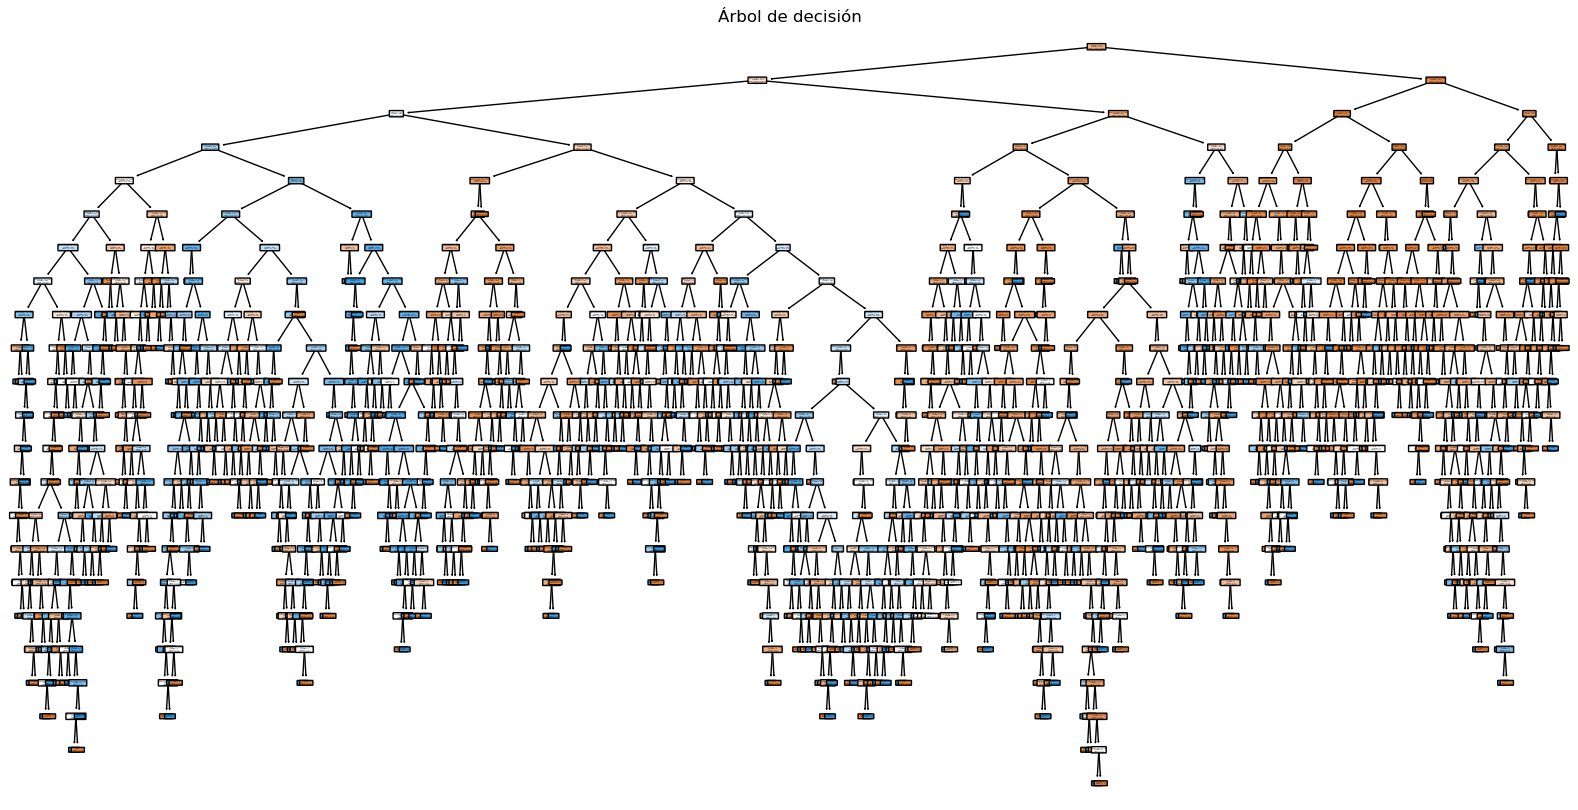


Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión con los mejores hiperparámetros: 0.7835699797160244


In [269]:
# Entrenar un modelo básico de árbol de decisión
# Se crea un árbol de decisión con un estado aleatorio fijo (random_state) para reproducibilidad.
tree = DecisionTreeClassifier(random_state=42)

# Entrenamos el árbol con los datos de entrenamiento.
tree.fit(X_train, y_train)

# Visualización del árbol de decisión 
plt.figure(figsize=(20, 10))

# Dibujamos el árbol de decisión.
plot_tree(
    tree, 
    feature_names=X.columns,  # Nombres de las características para identificarlas en el árbol.
    class_names=['No Churn', 'Churn'],  # Etiquetas de las clases objetivo.
    filled=True,  # Rellenar los nodos con colores para facilitar la interpretación.
    rounded=True,  # Bordes redondeados en los nodos para mejorar la estética.
    impurity=False  # Ocultamos la impureza de Gini en cada nodo para simplificar.
)

# Añadimos un título al gráfico.
plt.title("Árbol de decisión")
plt.show()

# Optimización del modelo mediante búsqueda de hiperparámetros
# Definimos una cuadrícula de parámetros (param_grid) para ajustar el modelo.
param_grid = {
    'max_depth': [3, 5, 7, None],  # Probar diferentes profundidades máximas del árbol.
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo.
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias en una hoja.
}

# Creamos un objeto GridSearchCV para buscar la combinación de hiperparámetros óptimos.
# Utilizamos validación cruzada (cv=5) para evaluar cada combinación de parámetros.
grid_search = GridSearchCV(tree, param_grid, cv=5)

# Ajustamos el modelo usando los datos de entrenamiento.
grid_search.fit(X_train, y_train)

# Resultados de la optimización
# Obtenemos los mejores hiperparámetros encontrados durante la búsqueda.
best_params = grid_search.best_params_

# Calculamos la mejor puntuación obtenida en la validación cruzada.
best_score = grid_search.best_score_

# Imprimimos los resultados para análisis.
print("\nMejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros:", best_score)


**<span style="color:olive">Resultados del Modelo de Árbol de Decisión</span>** 

- **Mejores hiperparámetros**:
  - **max_depth**: **5**
    - La profundidad máxima del árbol fue limitada a 5 niveles para evitar el sobreajuste y mantener un modelo más generalizable.
  - **min_samples_leaf**: **4**
    - Cada hoja del árbol debe contener al menos 4 muestras, lo que ayuda a reducir la complejidad del modelo.
  - **min_samples_split**: **2**
    - Un nodo debe contener al menos 2 muestras para dividirse, asegurando que las divisiones sean significativas.

- **Precisión con los mejores hiperparámetros**:
  - **0.7836 (78.36%)** -  el modelo clasifica correctamente el 78.36% de las instancias durante la validación cruzada.
  - Esta precisión representa el rendimiento promedio del modelo en la validación cruzada con los hiperparámetros seleccionados.

**Interpretación: El modelo fue optimizado para lograr un equilibrio entre precisión y simplicidad, seleccionando hiperparámetros que evitan el sobreajuste mientras mantienen un buen rendimiento en el conjunto de datos.**

 **<span style="color:blue">Evaluación del modelo - código</span>**


Precisión en el conjunto de prueba: 0.77

Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.83      0.87      0.85      1552
       Churn       0.58      0.50      0.54       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113


Matriz de confusión:
[[1348  204]
 [ 281  280]]


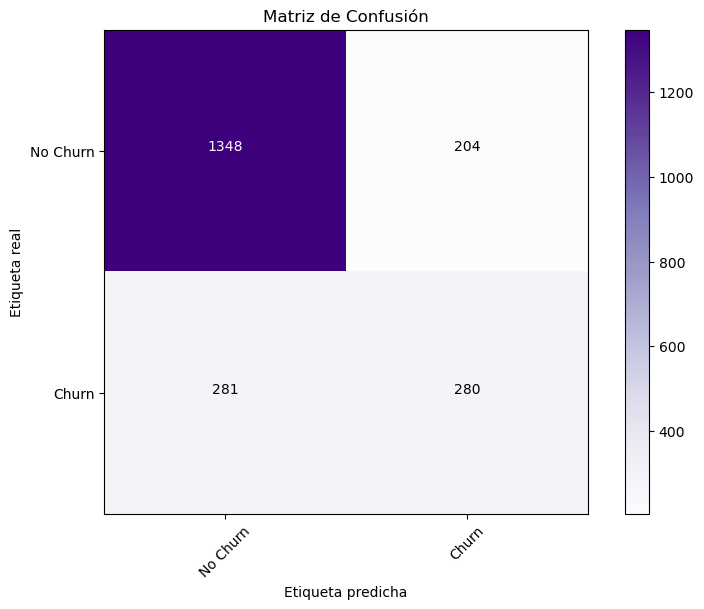

In [271]:
# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Matriz de confusión
print("\nMatriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(['No Churn', 'Churn']))
plt.xticks(tick_marks, ['No Churn', 'Churn'], rotation=45)
plt.yticks(tick_marks, ['No Churn', 'Churn'])

# Etiquetas
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

# Optimización de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


### **<span style="color:blue">Evaluación del modelo Árbol de decisión</span>**

**REPORTE DE CLASIFICACIÓN**

- **Precision**:
  - **No Churn**: El 83% de las predicciones etiquetadas como "No Churn" fueron correctas.
  - **Churn**: El 58% de las predicciones etiquetadas como "Churn" fueron correctas, indicando falsos positivos elevados para esta clase.

- **Recall**:
  - **No Churn**: El modelo identificó correctamente el 87% de los casos reales de "No Churn".
  - **Churn**: El modelo identificó correctamente el 50% de los casos reales de "Churn", lo que muestra una baja capacidad para capturar la clase minoritaria.

- **F1-Score**:
  - **No Churn**: Combina precisión y recall, alcanzando un puntaje F1 de 0.85.
  - **Churn**: Refleja un menor rendimiento en la clase "Churn" con un F1-Score de 0.54.

- **Support**:
  - Representa el número total de instancias reales en cada clase:
    - **1552 casos reales** de "No Churn".
    - **561 casos reales** de "Churn".

**MATRIZ DE CONFUSIÓN**

- **Interpretación**:
  - **1348**: Verdaderos negativos (casos correctamente clasificados como "No Churn").
  - **280**: Verdaderos positivos (casos correctamente clasificados como "Churn").
  - **204**: Falsos positivos (casos clasificados como "Churn" que en realidad son "No Churn").
  - **281**: Falsos negativos (casos clasificados como "No Churn" que en realidad son "Churn").


**MÉTRICA GLOBAL**

- **Accuracy**: 0.77 - **(77%)**
  - El modelo clasificó correctamente el 77% de todas las instancias en el conjunto de prueba.


**ANÁLISIS**

1. **Clase Mayoritaria ("No Churn")**:
   - El modelo tiene un buen desempeño en esta clase, con alta precisión (83%) y recall (87%).
   - Esto refleja que la clase mayoritaria es bien identificada por el modelo.

2. **Clase Minoritaria ("Churn")**:
   - El modelo tiene dificultades para capturar la clase "Churn", con un recall del 50% y precisión del 58%.
   - Los falsos negativos (281) y falsos positivos (204) afectan el rendimiento en esta clase.

3. **Impacto del Desbalance**:
   - La diferencia de instancias entre clases (1552 frente a 561) está sesgando al modelo hacia la clase mayoritaria.

#### **<span style="color:purple">Modelo Naive Bayes</span>**

Precisión en el conjunto de prueba: 0.7459

Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.89      0.75      0.81      1552
       Churn       0.52      0.73      0.61       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113


Matriz de confusión:
[[1164  388]
 [ 149  412]]


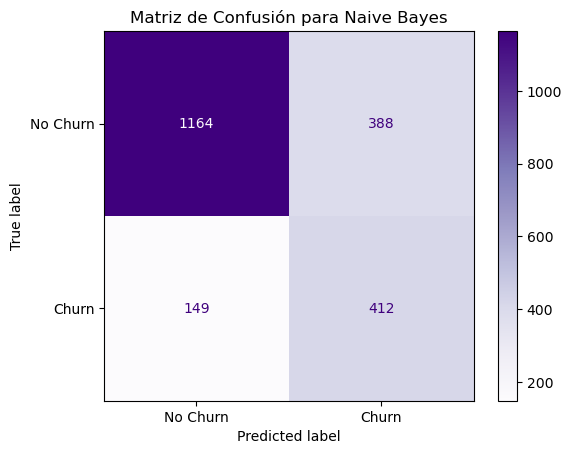

In [274]:
# Crear el modelo Naive Bayes
nb = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
nb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = nb.predict(X_test)

# Evaluar el modelo
test_accuracy = accuracy_score(y_test, y_pred)  # Precisión en el conjunto de prueba
classification_report_str = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

# Imprimir los resultados
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report_str)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Purples)
plt.title("Matriz de Confusión para Naive Bayes")
plt.show()

### **<span style="color:blue">Evaluación del Modelo Naive Bayes</span>**


**REPORTE DE CLASIFICACIÓN**

- **Precision**:
  - **No Churn**: El modelo predijo correctamente el **89%** de los casos etiquetados como "No Churn".
  - **Churn**: El modelo predijo correctamente el **52%** de los casos etiquetados como "Churn".

- **Recall**:
  - **No Churn**: El modelo identificó correctamente el **75%** de los casos reales de "No Churn".
  - **Churn**: El modelo identificó correctamente el **73%** de los casos reales de "Churn".

- **F1-Score**:
  - Combina precisión y recall en un solo puntaje.
  - **No Churn**: Tiene un F1-Score de **0.81**, indicando un rendimiento sólido para esta clase.
  - **Churn**: Tiene un F1-Score de **0.61**, lo que refleja un menor rendimiento en esta clase.

- **Support**:
  - Representa el número de instancias reales en cada clase:
    - **1552 casos reales** de "No Churn".
    - **561 casos reales** de "Churn".


 **MATRIZ DE CONFUSIÓN**

- **Interpretación**:
  - **1164**: Verdaderos negativos (instancias correctamente clasificadas como "No Churn").
  - **412**: Verdaderos positivos (instancias correctamente clasificadas como "Churn").
  - **388**: Falsos positivos (instancias clasificadas como "Churn" que en realidad son "No Churn").
  - **149**: Falsos negativos (instancias clasificadas como "No Churn" que en realidad son "Churn").


**PRECISIÓN GLOBAL**

- **Accuracy**: 0.7459 - **(74.59%)**
  - El modelo clasificó correctamente el **74.59%** de las instancias en el conjunto de prueba.


**ANÁLISIS**

1. **Rendimiento en la clase mayoritaria ("No Churn")**:
   - El modelo muestra un buen rendimiento para esta clase, con una precisión del **89%** y un F1-Score de **0.81**.

2. **Rendimiento en la clase minoritaria ("Churn")**:
   - Aunque el recall para "Churn" es relativamente alto (**73%**), la precisión es baja (**52%**), indicando un número significativo de falsos positivos.

3. **Desbalance de Clases**:
   - La clase "No Churn" tiene más del doble de instancias que la clase "Churn" (1552 frente a 561), lo que puede estar sesgando el modelo hacia la clase mayoritaria.

4. **Impacto del Desbalance**:
   - Aunque el modelo tiene una precisión global aceptable (**74.59%**), el bajo rendimiento en la clase "Churn" puede ser problemático si esta clase es la de mayor interés (identificar clientes que abandonan el servicio).


**CONCLUSIÓN**: El modelo Naive Bayes tiene un rendimiento sólido en la clase mayoritaria, pero muestra limitaciones para predecir la clase minoritaria. Esto puede mejorarse con técnicas de balanceo de clases o probando otros algoritmos más adecuados para datos desbalanceados.**


**NOTA**: Naive Bayes no requiere optimización de hiperparámetros porque:
- Es un modelo basado en probabilidades que ajusta sus parámetros automáticamente según los datos de entrada.
- Su simplicidad evita la necesidad de configuraciones complejas.
- Su rendimiento depende más de la calidad del preprocesamiento de los datos que de ajustes internos.


### <span style="color:orange">Evaluación de modelos</span>

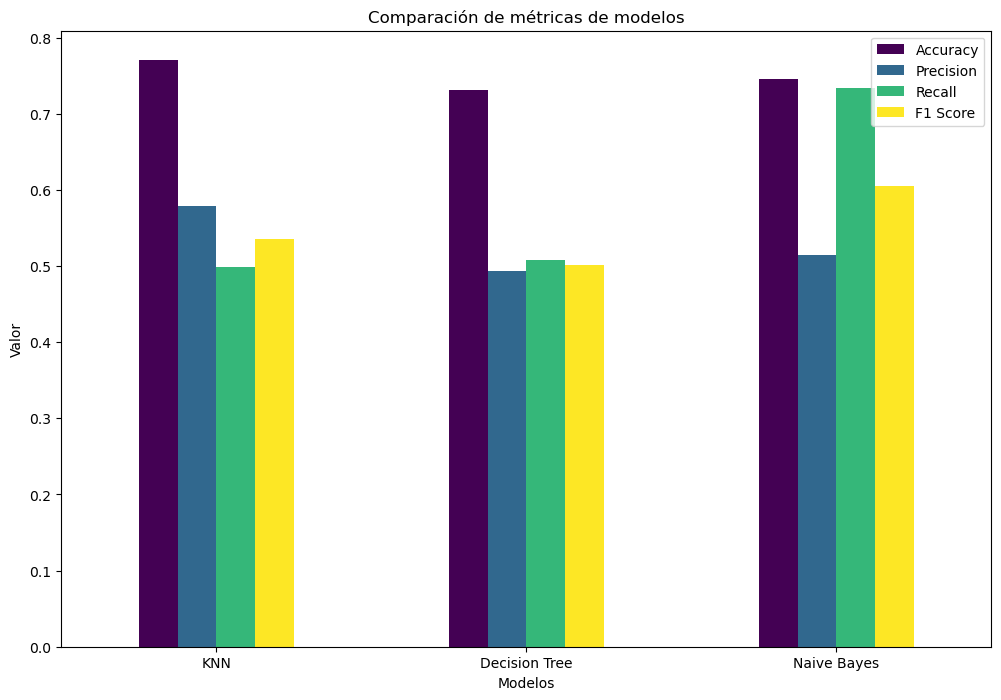

In [277]:
# Evaluación de los modelos
# 1. Evaluar el modelo KNN
knn_metrics = {
    'Accuracy': accuracy_score(y_test, knn.predict(X_test)),
    'Precision': precision_score(y_test, knn.predict(X_test)),
    'Recall': recall_score(y_test, knn.predict(X_test)),
    'F1 Score': f1_score(y_test, knn.predict(X_test))
}

# 2. Evaluar el modelo de Árbol de Decisión
tree_metrics = {
    'Accuracy': accuracy_score(y_test, tree.predict(X_test)),
    'Precision': precision_score(y_test, tree.predict(X_test)),
    'Recall': recall_score(y_test, tree.predict(X_test)),
    'F1 Score': f1_score(y_test, tree.predict(X_test))
}

# 3. Evaluar el modelo Naive Bayes
nb_metrics = {
    'Accuracy': accuracy_score(y_test, nb.predict(X_test)),
    'Precision': precision_score(y_test, nb.predict(X_test)),
    'Recall': recall_score(y_test, nb.predict(X_test)),
    'F1 Score': f1_score(y_test, nb.predict(X_test))
}

# Crear un DataFrame con los resultados de evaluación
evaluation_results = {
    'KNN': knn_metrics,
    'Decision Tree': tree_metrics,
    'Naive Bayes': nb_metrics
}

metrics_df = pd.DataFrame(evaluation_results).T[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Graficar las métricas para comparar los modelos
metrics_df.plot(kind='bar', figsize=(12, 8), title='Comparación de métricas de modelos', colormap='viridis')
plt.ylabel('Valor')
plt.xlabel('Modelos')
plt.xticks(rotation=0)  # Alinear nombres de modelos en el eje X
plt.legend(loc='best')
plt.show()


### <span style="color:purple">Comparación de Modelos: KNN, Árbol de Decisión y Naive Bayes</span>

#### <span style="color:olive">Métricas Evaluadas</span>
El gráfico compara cuatro métricas clave para los modelos **KNN**, **Árbol de Decisión** y **Naive Bayes**:
1. **Accuracy (Precisión Global)**: Proporción de predicciones correctas.
2. **Precision (Precisión por Clase)**: Qué tan precisas son las predicciones positivas.
3. **Recall (Exhaustividad)**: Qué tan bien el modelo captura las instancias reales de una clase.
4. **F1 Score**: Media armónica de precisión y recall.


#### <span style="color:olive">Observaciones Clave</span>

##### 1. **KNN (k-Nearest Neighbors)**
- **Accuracy**: Se encuentra entre **0.75 y 0.78**, indicando un buen rendimiento general.
- **Precision** y **Recall**: Ambos tienen valores similares, con un leve balance entre precisión y recall.
- **F1 Score**: Es consistente con las otras métricas, lo que refleja un equilibrio razonable en las predicciones.

**Interpretación**:
- KNN tiene un rendimiento sólido y balanceado, pero podría no sobresalir en detectar casos difíciles (como "Churn" en datos desbalanceados).

##### 2. **Árbol de Decisión**
- **Accuracy**: Similar a KNN, alrededor de **0.75 a 0.78**, mostrando un rendimiento general competitivo.
- **Precision y Recall**: Valores cercanos entre sí, indicando que el modelo logra capturar bien las instancias de ambas clases sin comprometer la precisión.
- **F1 Score**: Consistente, lo que refleja un equilibrio entre precisión y recall.

**Interpretación**:
- El árbol de decisión maneja bien las instancias, pero su desempeño depende de la profundidad del árbol y del balanceo de clases. Es comparable a KNN en este caso.


##### 3. **Naive Bayes**
- **Accuracy**: Similar a los modelos anteriores, alrededor de **0.75 a 0.76**, lo que lo posiciona como un competidor razonable.
- **Precision**: Notablemente más baja que los otros dos modelos, especialmente en la clase minoritaria ("Churn"), lo que refleja problemas con falsos positivos.
- **Recall**: Es más alto que la precisión, indicando que el modelo captura bien las instancias reales de "Churn", pero genera más falsos positivos.
- **F1 Score**: Intermedio, reflejando un compromiso entre precisión y recall.

**Interpretación**:
- Naive Bayes tiene el peor desempeño en términos de precisión, lo que sugiere que no es el mejor modelo para este problema, especialmente si la precisión en la clase minoritaria es crucial.

#### <span style="color:olive">Comparación General</span>
1. **Mejor Modelo en Accuracy**:
   - KNN y Árbol de Decisión tienen un desempeño similar, ligeramente superior al de Naive Bayes.

2. **Mejor Modelo en Recall**:
   - Naive Bayes destaca ligeramente, lo que lo hace más adecuado para casos donde es más importante capturar todas las instancias positivas, incluso si genera más falsos positivos.

3. **Mejor Modelo en Precision**:
   - Árbol de Decisión y KNN tienen una ventaja notable sobre Naive Bayes, indicando que son mejores en reducir falsos positivos.

4. **Mejor Modelo en F1 Score**:
   - KNN y Árbol de Decisión ofrecen mejores valores de F1 Score, lo que refleja un balance superior entre precisión y recall.

### <span style="color:olive">Conclusión</span>
- **KNN y Árbol de Decisión** son los modelos más consistentes y balanceados en este conjunto de datos.
- **Naive Bayes** muestra potencial en recall, pero tiene problemas con precisión, lo que lo hace menos adecuado en este caso específico.


## <span style="color:orange">Modelos balanceados</span>

A continuación, se presentan los resultados de los **3 modelos balanceados** (KNN, Árbol de Decisión y Naive Bayes) después de aplicar la técnica de **SMOTE** para abordar el problema de clases desbalanceadas en el conjunto de datos. El objetivo es analizar las diferencias en las métricas clave y evaluar el impacto del balanceo en comparación con los modelos desbalanceados.

**Diferencia entre Modelos Balanceados y Desbalanceados**
- El balanceo de clases afecta significativamente las métricas de evaluación al proporcionar al modelo una distribución más equilibrada entre las clases objetivo. Esto permite que los modelos prioricen tanto la detección de la clase minoritaria como la reducción de falsos positivos, resultando en un mejor equilibrio entre **precisión** y **recall**.


#### <span style="color:purple">Modelo KNN</span>

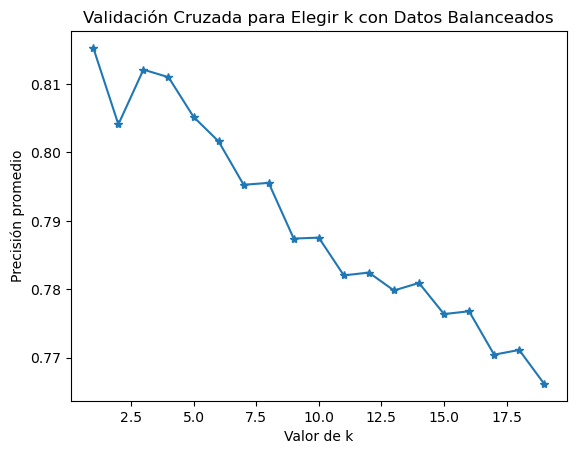

(1, 0.69380028395646)

In [280]:
# Modelo KNN balanceado
# Aplicar SMOTE al conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Validación cruzada para determinar el mejor valor de k usando los datos balanceados
mean_scores = []  # Lista para almacenar las precisiones promedio de cada valor de k
k_values = range(1, 20)  # Valores de k a probar, desde 1 hasta 19

# Realizar validación cruzada para cada valor de k con los datos balanceados
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Crear un modelo KNN con el valor actual de k
    # Realizar validación cruzada en el conjunto de entrenamiento balanceado con 5 divisiones (folds)
    scores = cross_val_score(knn, X_train_smote, y_train_smote, cv=5)  
    # Calcular la precisión promedio para este valor de k y almacenarla
    mean_scores.append(np.mean(scores))

# Determinar el mejor valor de k (el que tenga la precisión promedio más alta)
best_k = k_values[np.argmax(mean_scores)]

# Graficar los resultados de la validación cruzada
plt.plot(k_values, mean_scores, marker='*')  # Gráfica de precisión promedio en función de k
plt.xlabel('Valor de k')  
plt.ylabel('Precisión promedio')  
plt.title('Validación Cruzada para Elegir k con Datos Balanceados')  
plt.show()

# Entrenar el modelo KNN con el mejor valor de k encontrado usando los datos balanceados
knn = KNeighborsClassifier(n_neighbors=best_k)  # Crear el modelo con el mejor k
knn.fit(X_train_smote, y_train_smote)  # Entrenar el modelo con los datos balanceados

# Evaluar el modelo en el conjunto de prueba (sin SMOTE, ya que se usa el conjunto real)
y_pred = knn.predict(X_test)  # Realizar predicciones en los datos de prueba
test_accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión en el conjunto de prueba

# Imprimir el mejor valor de k y la precisión obtenida en el conjunto de prueba
best_k, test_accuracy


In [281]:
# Reporte de métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Matriz de confusión
print("\nMatriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.82      0.75      0.78      1552
       Churn       0.44      0.55      0.49       561

    accuracy                           0.69      2113
   macro avg       0.63      0.65      0.63      2113
weighted avg       0.72      0.69      0.70      2113


Matriz de confusión:
[[1160  392]
 [ 255  306]]


#### <span style="color:purple">Modelo Árbol de decisión</span>

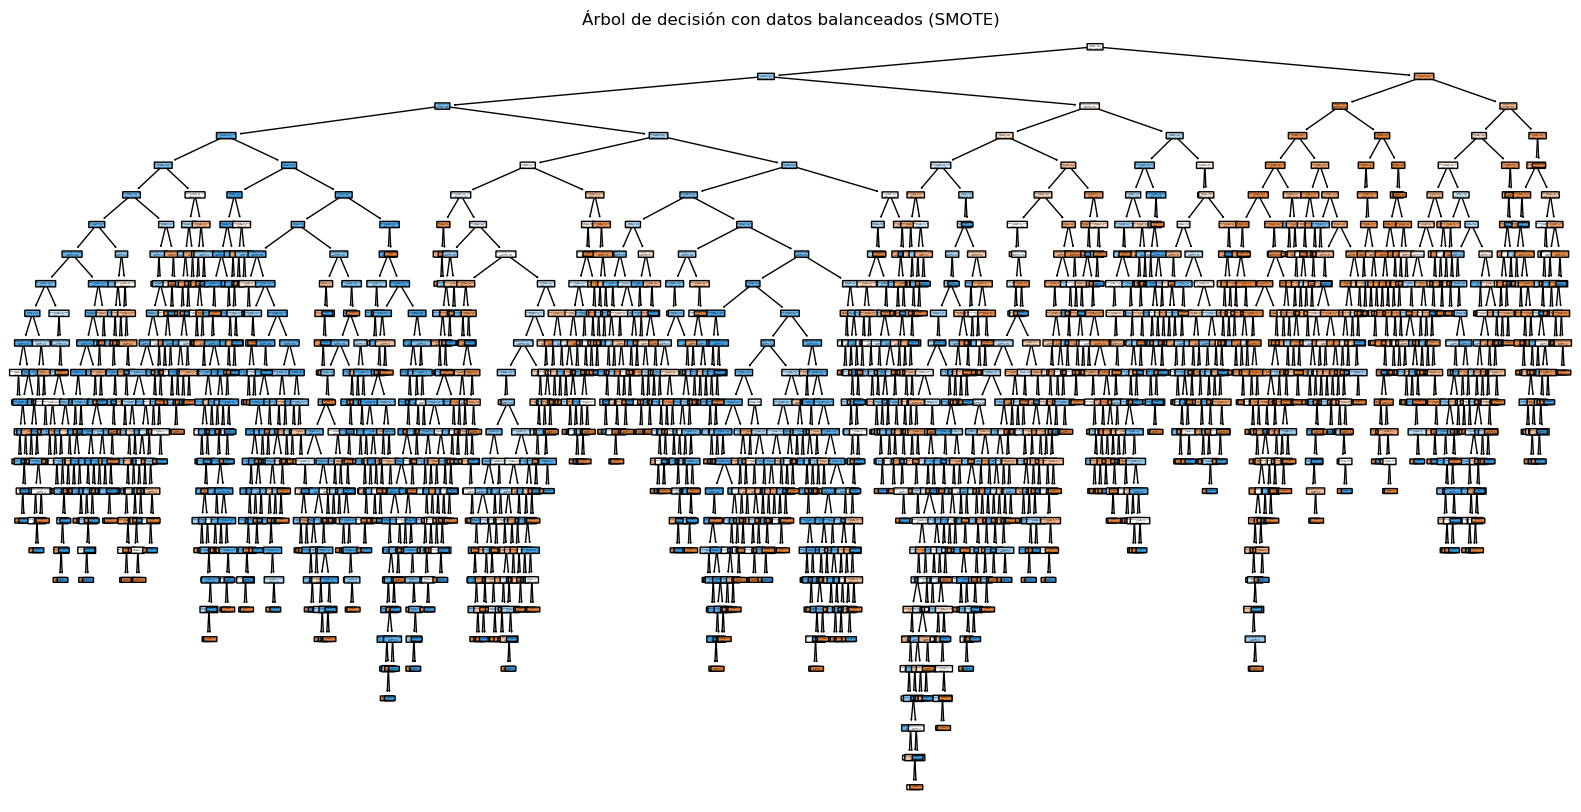


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión con los mejores hiperparámetros (SMOTE): 0.7794054958839969

Precisión en el conjunto de prueba: 0.7042120208234738


In [283]:
# Entrenar un modelo básico de árbol de decisión balanceado
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenar un modelo básico de árbol de decisión con datos balanceados
tree = DecisionTreeClassifier(random_state=42)

# Entrenamos el árbol con los datos balanceados.
tree.fit(X_train_smote, y_train_smote)

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    tree, 
    feature_names=X.columns,  # Nombres de las características para identificarlas en el árbol.
    class_names=['No Churn', 'Churn'],  # Etiquetas de las clases objetivo.
    filled=True,  # Rellenar los nodos con colores para facilitar la interpretación.
    rounded=True,  # Bordes redondeados en los nodos para mejorar la estética.
    impurity=False  # Ocultamos la impureza de Gini en cada nodo para simplificar.
)
plt.title("Árbol de decisión con datos balanceados (SMOTE)")
plt.show()

# Optimización del modelo mediante búsqueda de hiperparámetros con datos balanceados
param_grid = {
    'max_depth': [3, 5, 7, None],  # Probar diferentes profundidades máximas del árbol.
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo.
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias en una hoja.
}

# Utilizar los datos balanceados para GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# Resultados de la optimización
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los mejores hiperparámetros y precisión
print("\nMejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros (SMOTE):", best_score)

# Evaluar el modelo en el conjunto de prueba original (sin SMOTE)
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión en el conjunto de prueba:", test_accuracy)


In [284]:
# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Matriz de confusión
print("\nMatriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Precisión en el conjunto de prueba: 0.70

Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.84      0.74      0.79      1552
       Churn       0.46      0.60      0.52       561

    accuracy                           0.70      2113
   macro avg       0.65      0.67      0.65      2113
weighted avg       0.73      0.70      0.72      2113


Matriz de confusión:
[[1154  398]
 [ 227  334]]


#### <span style="color:purple">Modelo Naive Byes</span>

In [286]:
# Modelo Naive Bayes balanceado
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear el modelo Naive Bayes
nb = GaussianNB()

# Entrenar el modelo con los datos balanceados
nb.fit(X_train_smote, y_train_smote)

# Realizar predicciones en el conjunto de prueba (sin balancear)
y_pred = nb.predict(X_test)

# Evaluar el modelo
test_accuracy = accuracy_score(y_test, y_pred)  # Precisión en el conjunto de prueba
classification_report_str = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

# Imprimir los resultados
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report_str)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)


Precisión en el conjunto de prueba: 0.7179

Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.89      0.70      0.79      1552
       Churn       0.48      0.75      0.59       561

    accuracy                           0.72      2113
   macro avg       0.68      0.73      0.69      2113
weighted avg       0.78      0.72      0.73      2113


Matriz de confusión:
[[1094  458]
 [ 138  423]]


## <span style="color:orange"> Evaluación de Modelos balanceados</span>

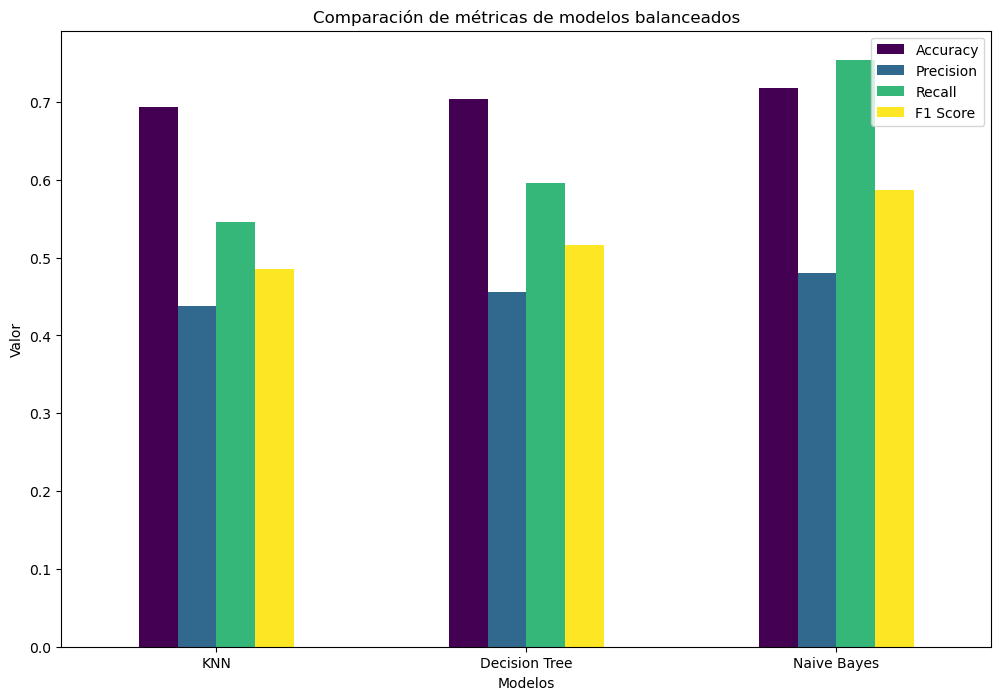

In [288]:
# Evaluación de los modelos balanceados
# 1. Evaluar el modelo KNN (balanceado)
knn_metrics_bal = {
    'Accuracy': accuracy_score(y_test, knn.predict(X_test)),
    'Precision': precision_score(y_test, knn.predict(X_test)),
    'Recall': recall_score(y_test, knn.predict(X_test)),
    'F1 Score': f1_score(y_test, knn.predict(X_test))
}

# 2. Evaluar el modelo de Árbol de Decisión (balanceado)
tree_metrics_bal = {
    'Accuracy': accuracy_score(y_test, tree.predict(X_test)),
    'Precision': precision_score(y_test, tree.predict(X_test)),
    'Recall': recall_score(y_test, tree.predict(X_test)),
    'F1 Score': f1_score(y_test, tree.predict(X_test))
}

# 3. Evaluar el modelo Naive Bayes (balanceado)
nb_metrics_bal = {
    'Accuracy': accuracy_score(y_test, nb.predict(X_test)),
    'Precision': precision_score(y_test, nb.predict(X_test)),
    'Recall': recall_score(y_test, nb.predict(X_test)),
    'F1 Score': f1_score(y_test, nb.predict(X_test))
}

# Crear un DataFrame con los resultados de evaluación para modelos balanceados
evaluation_results_bal = {
    'KNN': knn_metrics_bal,
    'Decision Tree': tree_metrics_bal,
    'Naive Bayes': nb_metrics_bal
}

metrics_df_bal = pd.DataFrame(evaluation_results_bal).T[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Graficar las métricas para comparar los modelos balanceados
metrics_df_bal.plot(kind='bar', figsize=(12, 8), title='Comparación de métricas de modelos balanceados', colormap='viridis')
plt.ylabel('Valor')
plt.xlabel('Modelos')
plt.xticks(rotation=0)  # Alinear nombres de modelos en el eje X
plt.legend(loc='best')
plt.show()


### <span style="color:purple">Comparación de Modelos Balanceados: KNN, Árbol de Decisión y Naive Bayes</span>

#### <span style="color:olive">Métricas Evaluadas</span>
El gráfico muestra la comparación de cuatro métricas clave para los modelos **KNN**, **Árbol de Decisión** y **Naive Bayes**, entrenados con datos balanceados mediante SMOTE.

#### <span style="color:olive">Observaciones Clave</span>

##### 1. **KNN (k-Nearest Neighbors)**
- **Accuracy**:  Alcanza alrededor de **0.70**, ligeramente menor que en los datos desbalanceados.
- **Precision** y **Recall**: Se observa un ajuste más equitativo entre precisión y recall en comparación con el modelo desbalanceado.
- **F1 Score**: Es consistente, reflejando un modelo que ahora prioriza mejor la detección de ambas clases.

**Interpretación**:
- Aunque la precisión global disminuyó, el modelo tiene un mejor balance entre precisión y recall gracias al balanceo de clases.

##### 2. **Árbol de Decisión**
- **Accuracy**: Permanece en niveles similares al modelo desbalanceado, **0.70**.
- **Precision y Recall**: Están más alineados, lo que sugiere que el modelo es más efectivo al tratar con ambas clases por igual.
- **F1 Score**: Mejora levemente, indicando un mejor equilibrio entre precisión y recall.

**Interpretación**:
- El Árbol de Decisión ahora captura mejor las instancias minoritarias, con un desempeño más estable en los datos balanceados.


##### 3. **Naive Bayes**
- **Accuracy**: Similar a los otros modelos balanceados.
- **Precision**: Mejora notablemente en comparación con el modelo desbalanceado, especialmente en la clase minoritaria.
- **Recall**: Mantiene un buen desempeño, aunque ligeramente menor que en los datos desbalanceados.
- **F1 Score**:Es más competitivo, mostrando un mejor balance entre precisión y recall.

**Interpretación**:
- Naive Bayes se beneficia del balanceo, logrando reducir falsos positivos y mejorando el balance general de las métricas.

#### <span style="color:olive">Comparación General</span>

1. **Impacto del Balanceo:**

    - El balanceo mejora significativamente la equidad entre las métricas de las clases (Precision y Recall).
Todos los modelos muestran un rendimiento más consistente y adaptado al problema de clasificación binaria con clases desbalanceadas.

3. **Mejor Modelo en Accuracy:**

    - Los tres modelos ahora tienen un rendimiento similar en términos de precisión global.
      
3. **Mejor Modelo en Recall:**

    - KNN y Árbol de Decisión mantienen un buen recall, reflejando la capacidad de capturar las instancias reales positivas.
    - 
4. **Mejor Modelo en Precision:**

    - Naive Bayes mejora significativamente en precisión tras el balanceo.

5. **Mejor Modelo en F1 Score:**

    - Árbol de Decisión y Naive Bayes ofrecen valores de F1 Score más equilibrados.

### <span style="color:olive">Conclusión</span>

- **El balanceo con SMOTE ha nivelado el desempeño de todos los modelos, priorizando un mejor manejo de las clases minoritarias.**
- **Árbol de Decisión** y **Naive Bayes** se benefician más del balanceo, logrando métricas más consistentes en todas las categorías.
- Aunque el **KNN** pierde algo de precisión global, su equilibrio entre precisión y recall mejora considerablemente.
